In [1]:
import sys 
# sys.path.append('/Users/geenaildefonso/Projects/NERM')
sys.path.append('../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
# print(sys.path)
from model_files.nerm import model as model
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
# from necro_pydream_model_file_8920 import model
from pysb.simulator import ScipyOdeSimulator
import numpy as np
from scipy.stats import norm,uniform
import seaborn as sns
from matplotlib import pyplot as plt
import random
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from scipy import stats
from pysb.simulator import SimulationResult
import pandas as pd
import seaborn as sns
os.environ["OPENBLAS_NUM_THREADS"] = "1"

rules: 25
reactions: 40
species: 37
parameters: 54
rate constants: 40

ComponentSet([
 Parameter('TNF_0', 2326.0),
 Parameter('TNFR_0', 4800.0),
 Parameter('TRADD_0', 4696.0),
 Parameter('RIP1_0', 40000.0),
 Parameter('TRAF_0', 11776.0),
 Parameter('cIAP_0', 9000.0),
 Parameter('A20_0', 9000.0),
 Parameter('CYLD_0', 9000.0),
 Parameter('FADD_0', 3109.0),
 Parameter('flip_L_0', 3900.0),
 Parameter('Lubac_0', 7226.0),
 Parameter('C8_0', 3799.0),
 Parameter('RIP3_0', 10654.0),
 Parameter('MLKLa_0', 5544.0),
 Parameter('p1f', 1e-06),
 Parameter('p1r', 0.001),
 Parameter('p2f', 0.001),
 Parameter('p3f', 1e-06),
 Parameter('p3r', 0.001),
 Parameter('p4f', 1e-06),
 Parameter('p4r', 0.001),
 Parameter('p5f', 1e-06),
 Parameter('p5r', 0.001),
 Parameter('p6f', 1e-06),
 Parameter('p6r', 0.001),
 Parameter('p7f', 0.1),
 Parameter('p8f', 1e-06),
 Parameter('p8r', 0.001),
 Parameter('p9f', 1e-06),
 Parameter('p9r', 0.001),
 Parameter('p10f', 0.1),
 Parameter('p11f', 1e-06),
 Parameter('p11r', 0.001

In [ ]:
print(len(model.species))
print(len(model.parameters_rules()))
print(len(model.reactions))

In [ ]:
model.reactions

In [ ]:
mode1_100 = np.load('../../param_files/necro_pars10k_cluster0_5720_mod.npy')
mode2_100 = np.load('../../param_files/necro_pars10k_cluster1_5720_mod.npy')
mode3_100 = np.load('../../param_files/necro_pars10k_cluster2_5720_mod.npy')
mode4_100 = np.load('../../param_files/necro_pars10k_cluster3_5720_mod.npy')
pars = np.load('../../param_files/necro_pars10k_allclusmod.npy')

In [2]:
mode4_100e = np.load('../../param_files/necro_pars10k_cluster41_5720_modsplit.npy')
mode4_100m = np.load('../../param_files/necro_pars10k_cluster42_5720_modsplit.npy')
mode4_100d = np.load('../../param_files/necro_pars10k_cluster43_5720_modsplit.npy')

In [3]:
tspan = np.linspace(0, 1440, 1441)

In [ ]:
solverwtm4 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm4 = solverwtm4.run(param_values=mode4_100, num_processors = 20)
m4df100wt = wtm4.dataframe

In [ ]:
m4df100wt['MLKLa_obs'].iloc[:].max()

In [ ]:
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
#10TNF
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
#1TNF
plt.errorbar(x1/60, y1*5544,
             yerr=[(0,0.085233734*5544,0.006063293*5544,0.009426917*5544,0.011334223*5544,
                    0.02*5544),(400,400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)

plt.errorbar(x2/60, y2*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
#01 TNF
plt.errorbar(x01/60, y01*5544,
              yerr=[(0, 0.006714721*5544,0.007776423*5544,0.00919829*5544,0.001772636*5544,
                    0.005*5544, 0.013633013*5544), (400,400,400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)

In [ ]:
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])

x1 = np.array([0, 30, 90, 270,480, 720])
x2 = np.array([960])
y2 = np.array([0.109561346])
y1 = np.array([0,0.085233734,0.006063293,0.009426917,0.011334223, 0.02])

x01 = np.array([0, 30, 90, 270,480, 720, 960])
y01 = np.array([0, 0.006714721,0.007776423,0.00919829,0.001772636, 0.005, 0.013633013])

In [ ]:
fig, ax = plt.subplots(figsize = (7, 4))
for n in range(len(mode4_100)):
    plt.plot(tspan/60, m4df100wt.loc[n]['MLKLa_obs'].iloc[:]/m4df100wt['MLKLa_obs'].iloc[:].max(),
             label = 'pMLKL', zorder =1, lw=2)
ax.errorbar(x1001/60, y1001,
             yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
             (.07,.07,.07,.07)],
                   fmt='.k', ecolor ='black', alpha = 1, zorder = 2)
ax.errorbar(x1002/60, y1002,
             yerr= .07, fmt='.k', ecolor ='black', alpha = 1, zorder = 2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0, ymax = 1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode3_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [ ]:
df = pd.concat([m4df100wt],
               keys=['wt100'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt100'): 'blue'}

lower_quantile = 0.01  # 10%
upper_quantile = 0.98  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile]/5544,
                    quantile_data.loc[:, upper_quantile]/5544,
                    color=colour,
                    alpha=.5)
ax.errorbar(x1001/60, y1001,
             yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
             (.07,.07,.07,.07)],
                   fmt='.k', ecolor ='black', alpha = 1, zorder = 2)
ax.errorbar(x1002/60, y1002,
             yerr= .07, fmt='.k', ecolor ='black', alpha = 1, zorder = 2)
ax.set_xticks([0, 5, 10, 15, 20, 24])    
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)    
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
# plt.xlim(xmax =24)
plt.ylim(ymin = 1e-3, ymax = 1)
# fig.savefig("updatedkos/necro_10k_5720_wdata_alltnf.pdf")
plt.show()

In [ ]:
df = pd.concat([m4df100wt],
               keys=['wt100'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt100'): 'blue'}

lower_quantile = 0.0  # 10%
upper_quantile = 1.0  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile]/5544,
                    quantile_data.loc[:, upper_quantile]/5544,
                    color=colour,
                    alpha=.5)
ax.errorbar(x1001/60, y1001,
             yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
             (.07,.07,.07,.07)],
                   fmt='.k', ecolor ='black', alpha = 1, zorder = 2)
ax.errorbar(x1002/60, y1002,
             yerr= .07, fmt='.k', ecolor ='black', alpha = 1, zorder = 2)
ax.set_xticks([0, 5, 10, 15, 20, 24])    
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)    
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
# plt.xlim(xmax =24)
plt.ylim(ymin = 1e-3, ymax = 1)
# fig.savefig("updatedkos/necro_10k_5720_wdata_alltnf.pdf")
plt.show()

In [4]:
solverwtm4e = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm4e = solverwtm4e.run(param_values=mode4_100e, num_processors = 20)
m4edf100wt = wtm4e.dataframe

2021-12-22 19:20:55.243 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-12-22 19:20:55.956 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-12-22 19:20:56.075 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-12-22 19:20:56.127 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-12-22 19:20:58.883 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-12-22 19:20:58.885 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-12-22 19:20:59.104 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [ ]:
solverwtm4e = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm4e = solverwtm4e.run(param_values=mode4_100e, num_processors = 20)
m4ealldf100wt = wtm4e.dataframe

In [ ]:
for i,p in enumerate(np.linspace(0, 1440, 1441)):
    print(i,":",p)

In [ ]:
sim_idx_mode4e = [idx for idx in range(len(mode4_100e)) if m4ealldf100wt['MLKLa_obs'][idx].iloc[300] <= 2772]
print(sim_idx_mode4e)

In [ ]:
fig, ax = plt.subplots(figsize = (7, 4))
for n in range(len(mode4_100e)):
    plt.plot(tspan/60, m4ealldf100wt.loc[n]['MLKLa_obs'].iloc[:]/m4ealldf100wt['MLKLa_obs'].iloc[:].max(),
             label = 'pMLKL', zorder =1, lw=2)
plt.plot(tspan/60, m4edf100wt['MLKLa_obs'].iloc[:]/m4edf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', color = 'black', linestyle = '--',lw=5)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0, ymax = 1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode3_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [ ]:
m = model.monomers
# rip1 = wtm4e.observable(m.RIP1())
# rip1ub = wtm4e.observable(m.RIP1(state='K63ub'))
# rip1db = wtm4e.observable(m.RIP1(state='deub'))
# rip1all= rip1un+rip1ub+rip1db

In [ ]:
rip1 = wtm4e.observable(m.RIP1())

In [ ]:
rip1

In [ ]:
m4edf100wt['RIP1unphos_obs']

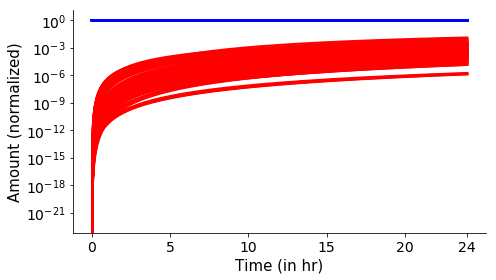

In [8]:
fig, ax = plt.subplots(figsize = (7, 4))
for n in range(len(mode4_100e)):
    plt.plot(tspan/60, m4edf100wt.loc[n]['RIP1unphos_obs'].iloc[:]/m4edf100wt.loc[n]['RIP1_obs'].iloc[:],label = 'RIP1_unphos', color = 'blue',zorder =1, lw=2)
    plt.plot(tspan/60, m4edf100wt.loc[n]['RIP1phos_obs'].iloc[:]/m4edf100wt.loc[n]['RIP1_obs'].iloc[:],label = 'RIP1_phos', color = 'red',zorder =1, lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
# plt.ylim(ymin = 0.8)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode4e_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [ ]:
fig, ax = plt.subplots(figsize = (7, 4))
plt.plot(tspan/60, m4edf100wt['CI_k63_obs'].iloc[:]/m4edf100wt['CI_k63_obs'].iloc[:].max(), label = 'CI_k63',color = 'blue', lw=4)
plt.plot(tspan/60, m4edf100wt['CII_C8a_obs'].iloc[:]/m4edf100wt['CII_C8a_obs'].iloc[:].max(), label = 'CII_C8FL',color = 'orange',lw=4)
plt.plot(tspan/60, m4edf100wt['CII_RIP3_obs'].iloc[:]/m4edf100wt['CII_RIP3_obs'].iloc[:].max(), label = 'CII_RIP3',color = 'green',lw=4)
plt.plot(tspan/60, m4edf100wt['RIP1RIP3unmod_obs'].iloc[:]/m4edf100wt['RIP1RIP3unmod_obs'].iloc[:].max(), label = 'Necrosome',color = 'purple',lw=4)
plt.plot(tspan/60, m4edf100wt['MLKLa_obs'].iloc[:]/m4edf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', color = 'black', linestyle = '--',lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode4e_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [ ]:
solverm4m = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm4m = solverm4m.run(param_values=mode4_100m[7], num_processors = 20)
m4mdf100wt = wtm4m.dataframe

In [ ]:
fig, ax = plt.subplots(figsize = (7, 4))
plt.plot(tspan/60, m4mdf100wt['CI_k63_obs'].iloc[:]/m4mdf100wt['CI_k63_obs'].iloc[:].max(), label = 'CI_k63',color = 'blue', lw=4)
plt.plot(tspan/60, m4mdf100wt['CII_C8a_obs'].iloc[:]/m4mdf100wt['CII_C8a_obs'].iloc[:].max(), label = 'CII_C8FL',color = 'orange',lw=4)
plt.plot(tspan/60, m4mdf100wt['CII_RIP3_obs'].iloc[:]/m4mdf100wt['CII_RIP3_obs'].iloc[:].max(), label = 'CII_RIP3',color = 'green',lw=4)
plt.plot(tspan/60, m4mdf100wt['RIP1RIP3unmod_obs'].iloc[:]/m4mdf100wt['RIP1RIP3unmod_obs'].iloc[:].max(), label = 'Necrosome',color = 'purple',lw=4)
plt.plot(tspan/60, m4mdf100wt['MLKLa_obs'].iloc[:]/m4mdf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', linestyle = '--',color = 'black',lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode4m_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [ ]:
solverm4d = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm4d = solverm4d.run(param_values=mode4_100d[3], num_processors = 20)
m4ddf100wt = wtm4d.dataframe

In [ ]:
fig, ax = plt.subplots(figsize = (7, 4))
plt.plot(tspan/60, m4ddf100wt['CI_k63_obs'].iloc[:]/m4ddf100wt['CI_k63_obs'].iloc[:].max(), label = 'CI_k63',color = 'blue', lw=4)
plt.plot(tspan/60, m4ddf100wt['CII_C8a_obs'].iloc[:]/m4ddf100wt['CII_C8a_obs'].iloc[:].max(), label = 'CII_C8FL',color = 'orange',lw=4)
plt.plot(tspan/60, m4ddf100wt['CII_RIP3_obs'].iloc[:]/m4ddf100wt['CII_RIP3_obs'].iloc[:].max(), label = 'CII_RIP3',color = 'green',lw=4)
plt.plot(tspan/60, m4ddf100wt['RIP1RIP3unmod_obs'].iloc[:]/m4ddf100wt['RIP1RIP3unmod_obs'].iloc[:].max(), label = 'Necrosome',color = 'purple',lw=4)
plt.plot(tspan/60, m4ddf100wt['MLKLa_obs'].iloc[:]/m4ddf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', color = 'black',linestyle = '--',lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode4d_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 